In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\

In [2]:
# read yrbook_remote data
mean_yield_yrbook = pd.read_pickle('./Data/Yearbook_link_remote.pkl')

In [3]:
# get the mean_yield data of wheat and cron
mean_yield_yrbook_wheat = mean_yield_yrbook[mean_yield_yrbook['Crop']=='Wheat']
mean_yield_yrbook_corn = mean_yield_yrbook[mean_yield_yrbook['Crop']=='Corn']

##### RNN model for wheat

In [54]:
# convert the data into array
X = np.array([in_df.drop(['Date','NAME'],1).values for in_df in mean_yield_yrbook_wheat['In_feature'].values])
y = np.array(mean_yield_yrbook_wheat['Value']).reshape(-1,1)

In [55]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# standardize the data
scaler = MinMaxScaler()

# convert the data from 3d to 2d
X_train_2d = X_train.reshape(-1,X_train.shape[2])
X_test_2d = X_test.reshape(-1,X_test.shape[2])

# stadardized the 2d data
X_train_2d_standard = scaler.fit_transform(X_train_2d)
X_test_2d_standard = scaler.transform(X_test_2d)

# reshape the 2d data back to 3d
X_train_standard = X_train_2d_standard.reshape(X_train.shape).reshape(X_train.shape[0],-1)
X_test_standard = X_test_2d_standard.reshape(X_test.shape).reshape(X_test.shape[0],-1)

##### Built the RNN model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,BatchNormalization,Dropout

In [58]:
regressior = Sequential()

regressior.add(Dense(units=X_train_standard.shape[1],activation='relu',input_dim=X_train_standard.shape[1]))
regressior.add(Dense(units=500,activation='relu'))
regressior.add(Dense(units=100,activation='relu'))
regressior.add(Dense(units=25,activation='relu'))
regressior.add(Dense(units=5,activation='relu'))
regressior.add(Dense(units=1))

In [59]:
regressior.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1155)              1335180   
_________________________________________________________________
dense_28 (Dense)             (None, 500)               578000    
_________________________________________________________________
dense_29 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_30 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 130       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 6         
Total params: 1,965,941
Trainable params: 1,965,941
Non-trainable params: 0
____________________________________________

In [60]:
regressior.compile(optimizer='adam',loss='MSE')

In [61]:
regressior.fit(X_train_standard,y_train,epochs=500,batch_size=128,validation_data=(X_test_standard,y_test))

Train on 1378 samples, validate on 345 samples
Epoch 1/500
1378/1378 [==============================] - 1s 456us/sample - loss: 30646781.9826 - val_loss: 26378537.3565
Epoch 2/500
1378/1378 [==============================] - 0s 127us/sample - loss: 17553498.6277 - val_loss: 3193714.8464
Epoch 3/500
1378/1378 [==============================] - 0s 127us/sample - loss: 4292297.3200 - val_loss: 1908250.7471
Epoch 4/500
1378/1378 [==============================] - 0s 124us/sample - loss: 2771309.7221 - val_loss: 2365393.7906
Epoch 5/500
1378/1378 [==============================] - 0s 125us/sample - loss: 2183225.6655 - val_loss: 1949487.4308
Epoch 6/500
1378/1378 [==============================] - 0s 127us/sample - loss: 1878512.7348 - val_loss: 1620822.3192
Epoch 7/500
1378/1378 [==============================] - 0s 125us/sample - loss: 1756915.1834 - val_loss: 1493993.0616
Epoch 8/500
1378/1378 [==============================] - 0s 130us/sample - loss: 1618297.8547 - val_loss: 1397753.278

Epoch 70/500
1378/1378 [==============================] - 0s 172us/sample - loss: 636121.6582 - val_loss: 698472.8397
Epoch 71/500
1378/1378 [==============================] - 0s 174us/sample - loss: 637301.0297 - val_loss: 694189.3264
Epoch 72/500
1378/1378 [==============================] - 0s 170us/sample - loss: 627278.2453 - val_loss: 690284.9582
Epoch 73/500
1378/1378 [==============================] - 0s 173us/sample - loss: 622356.0658 - val_loss: 695459.3685
Epoch 74/500
1378/1378 [==============================] - 0s 176us/sample - loss: 617472.0923 - val_loss: 709891.7487
Epoch 75/500
1378/1378 [==============================] - 0s 170us/sample - loss: 623681.6812 - val_loss: 686678.7083
Epoch 76/500
1378/1378 [==============================] - 0s 173us/sample - loss: 606534.7700 - val_loss: 679461.4339
Epoch 77/500
1378/1378 [==============================] - 0s 172us/sample - loss: 604256.3184 - val_loss: 693156.3129
Epoch 78/500
1378/1378 [==============================] 

1378/1378 [==============================] - 0s 161us/sample - loss: 499879.9159 - val_loss: 601293.4457
Epoch 140/500
1378/1378 [==============================] - 0s 158us/sample - loss: 476477.6768 - val_loss: 620724.3886
Epoch 141/500
1378/1378 [==============================] - 0s 154us/sample - loss: 523165.3350 - val_loss: 671845.3781
Epoch 142/500
1378/1378 [==============================] - 0s 157us/sample - loss: 501771.0766 - val_loss: 617851.3507
Epoch 143/500
1378/1378 [==============================] - 0s 157us/sample - loss: 492261.6163 - val_loss: 591215.6629
Epoch 144/500
1378/1378 [==============================] - 0s 161us/sample - loss: 504990.5862 - val_loss: 651997.7259
Epoch 145/500
1378/1378 [==============================] - 0s 158us/sample - loss: 518258.8501 - val_loss: 603101.2176
Epoch 146/500
1378/1378 [==============================] - 0s 162us/sample - loss: 504430.4651 - val_loss: 598517.6534
Epoch 147/500
1378/1378 [==============================] - 0s 

Epoch 208/500
1378/1378 [==============================] - 0s 157us/sample - loss: 420949.2949 - val_loss: 620425.1991
Epoch 209/500
1378/1378 [==============================] - 0s 151us/sample - loss: 431911.6028 - val_loss: 654080.9234
Epoch 210/500
1378/1378 [==============================] - 0s 163us/sample - loss: 467390.7226 - val_loss: 570621.1929
Epoch 211/500
1378/1378 [==============================] - 0s 152us/sample - loss: 446580.7261 - val_loss: 678335.6446
Epoch 212/500
1378/1378 [==============================] - 0s 157us/sample - loss: 468813.7891 - val_loss: 648839.5466
Epoch 213/500
1378/1378 [==============================] - 0s 157us/sample - loss: 440071.5827 - val_loss: 565084.3065
Epoch 214/500
1378/1378 [==============================] - 0s 154us/sample - loss: 418396.9800 - val_loss: 559071.1511
Epoch 215/500
1378/1378 [==============================] - 0s 156us/sample - loss: 415541.0763 - val_loss: 575451.4808
Epoch 216/500
1378/1378 [=======================

Epoch 277/500
1378/1378 [==============================] - 0s 154us/sample - loss: 387818.5891 - val_loss: 553218.3764
Epoch 278/500
1378/1378 [==============================] - 0s 155us/sample - loss: 394842.7581 - val_loss: 594401.4623
Epoch 279/500
1378/1378 [==============================] - 0s 161us/sample - loss: 392578.1283 - val_loss: 546862.3221
Epoch 280/500
1378/1378 [==============================] - 0s 159us/sample - loss: 402675.2358 - val_loss: 555993.5002
Epoch 281/500
1378/1378 [==============================] - 0s 160us/sample - loss: 407697.0334 - val_loss: 556397.7929
Epoch 282/500
1378/1378 [==============================] - 0s 153us/sample - loss: 387929.6802 - val_loss: 548889.0545
Epoch 283/500
1378/1378 [==============================] - 0s 162us/sample - loss: 392990.4302 - val_loss: 549699.4380
Epoch 284/500
1378/1378 [==============================] - 0s 159us/sample - loss: 384226.4055 - val_loss: 657493.9188
Epoch 285/500
1378/1378 [=======================

Epoch 346/500
1378/1378 [==============================] - 0s 163us/sample - loss: 373961.1832 - val_loss: 549120.8603
Epoch 347/500
1378/1378 [==============================] - 0s 165us/sample - loss: 369972.3218 - val_loss: 562815.9116
Epoch 348/500
1378/1378 [==============================] - 0s 157us/sample - loss: 367531.4835 - val_loss: 570896.3428
Epoch 349/500
1378/1378 [==============================] - 0s 160us/sample - loss: 384304.6591 - val_loss: 577048.3877
Epoch 350/500
1378/1378 [==============================] - 0s 164us/sample - loss: 382322.3850 - val_loss: 658633.1234
Epoch 351/500
1378/1378 [==============================] - 0s 164us/sample - loss: 382248.6470 - val_loss: 543084.2290
Epoch 352/500
1378/1378 [==============================] - 0s 160us/sample - loss: 366379.7541 - val_loss: 538670.9197
Epoch 353/500
1378/1378 [==============================] - 0s 160us/sample - loss: 358572.3733 - val_loss: 543834.4725
Epoch 354/500
1378/1378 [=======================

Epoch 415/500
1378/1378 [==============================] - 0s 165us/sample - loss: 373647.3437 - val_loss: 600068.1761
Epoch 416/500
1378/1378 [==============================] - 0s 162us/sample - loss: 355529.8225 - val_loss: 532053.0976
Epoch 417/500
1378/1378 [==============================] - 0s 164us/sample - loss: 366821.6865 - val_loss: 585781.3076
Epoch 418/500
1378/1378 [==============================] - 0s 167us/sample - loss: 368800.1924 - val_loss: 541786.2351
Epoch 419/500
1378/1378 [==============================] - 0s 163us/sample - loss: 343592.6370 - val_loss: 560088.7150
Epoch 420/500
1378/1378 [==============================] - 0s 170us/sample - loss: 376747.2380 - val_loss: 744857.8491
Epoch 421/500
1378/1378 [==============================] - 0s 166us/sample - loss: 432629.2807 - val_loss: 659789.6152
Epoch 422/500
1378/1378 [==============================] - 0s 167us/sample - loss: 393892.8125 - val_loss: 529402.6630
Epoch 423/500
1378/1378 [=======================

Epoch 484/500
1378/1378 [==============================] - 0s 165us/sample - loss: 361038.5074 - val_loss: 538184.9237
Epoch 485/500
1378/1378 [==============================] - 0s 162us/sample - loss: 333472.3857 - val_loss: 543271.3225
Epoch 486/500
1378/1378 [==============================] - 0s 156us/sample - loss: 322247.4196 - val_loss: 535717.8866
Epoch 487/500
1378/1378 [==============================] - 0s 152us/sample - loss: 362946.3114 - val_loss: 537284.8317
Epoch 488/500
1378/1378 [==============================] - 0s 164us/sample - loss: 377384.1302 - val_loss: 540890.0911
Epoch 489/500
1378/1378 [==============================] - 0s 159us/sample - loss: 338424.0089 - val_loss: 559215.4621
Epoch 490/500
1378/1378 [==============================] - 0s 153us/sample - loss: 322242.8386 - val_loss: 554007.3482
Epoch 491/500
1378/1378 [==============================] - 0s 159us/sample - loss: 320644.4378 - val_loss: 589822.9777
Epoch 492/500
1378/1378 [=======================

<AxesSubplot:>

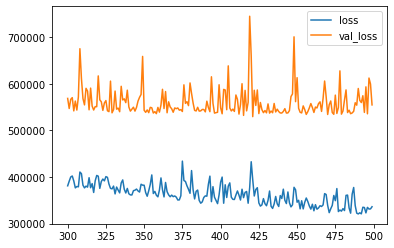

In [62]:
pd.DataFrame(regressior.history.history)[300:].plot()

<AxesSubplot:>

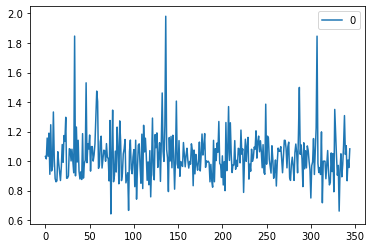

In [63]:
pd.DataFrame(regressior.predict(X_test_standard)/y_test).plot()

In [64]:
df = pd.DataFrame(regressior.predict(X_test_standard)/y_test)

<AxesSubplot:>

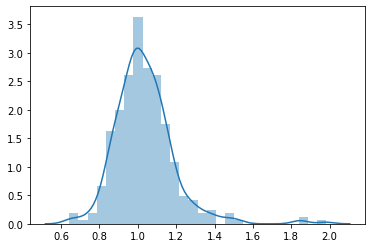

In [65]:
sns.distplot(df)

In [66]:
df.std()

0    0.158002
dtype: float64

In [69]:
df.median()

0    1.011668
dtype: float64